In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.set_option('mode.chained_assignment', None)

In [2]:
# df1 = pd.read_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data.csv",index_col = 0)
# df2 = pd.read_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data2.csv",index_col = 0)
# df3 = pd.read_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data3.csv",index_col = 0)
# df = [df1 , df3]
# df = pd.concat(df)
# df = df.reset_index(drop = True)
# df.to_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data.csv")

df = pd.read_csv("/media/rghoshal/D4A6E10AA6E0EE44/UGP/datasets/data.csv",index_col = 0)
df.describe()

,lat,lon,sla,precip,enso
count,162240.000000,162240.000000,78936.000000,162240.000000,162240.000000
mean,22.500000,75.000000,0.019765,2.422039,-0.019327
std,14.415748,18.750058,0.095448,3.397100,0.864243
min,-1.250000,43.750000,-1.237050,0.000000,-1.700000
25%,10.625000,58.750000,0.000000,0.191283,-0.590000
50%,22.500000,75.000000,0.000000,0.856688,-0.105000
75%,34.375000,91.250000,0.062801,3.381955,0.442500
max,46.250000,106.250000,0.659824,45.383766,2.640000


In [3]:
df.dtypes

time       object
lat       float64
lon       float64
sla       float64
precip    float64
enso      float64
dtype: object

In [4]:
df.shape

(162240, 6)

In [5]:
df[df.duplicated()]

,time,lat,lon,sla,precip,enso


In [6]:
df.count()

time      162240
lat       162240
lon       162240
sla        78936
precip    162240
enso      162240
dtype: int64

In [7]:
df.isnull().sum()

time          0
lat           0
lon           0
sla       83304
precip        0
enso          0
dtype: int64

In [8]:
df["sla"] = df["sla"].groupby(pd.DatetimeIndex(df['time']).month).transform(lambda x: (x - x.mean()) / x.std())

<AxesSubplot:xlabel='time', ylabel='sla'>

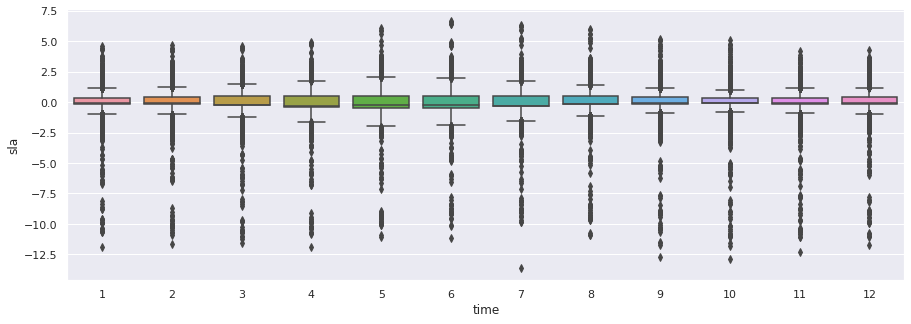

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x = pd.DatetimeIndex(df['time']).month , y = "sla", data =df)

<AxesSubplot:xlabel='time', ylabel='precip'>

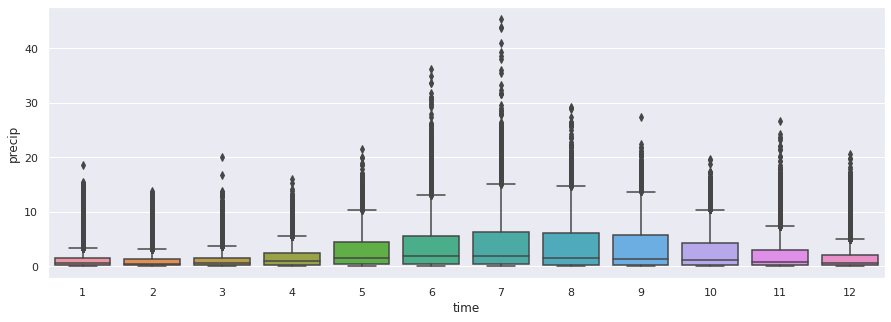

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(x = pd.DatetimeIndex(df['time']).month , y = "precip",data =df)

<AxesSubplot:xlabel='time', ylabel='enso'>

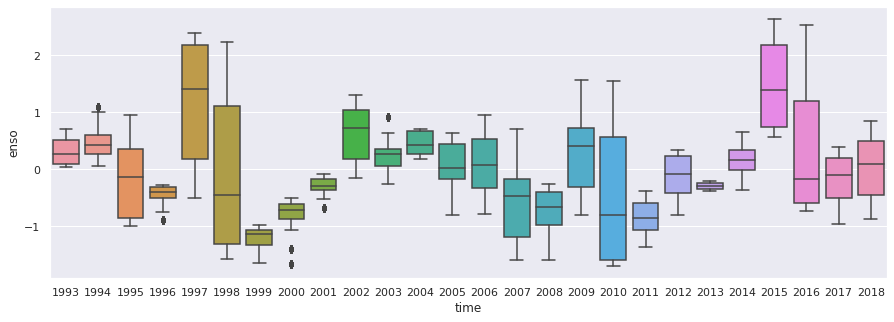

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x = pd.DatetimeIndex(df['time']).year , y = "enso",data =df)

In [12]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
IQR

lat       23.750000
lon       32.500000
sla        0.802731
precip     3.190672
enso       1.032500
dtype: float64

In [13]:
df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

,time,lat,lon,sla,precip,enso
0,1993-01-15,-1.25,43.75,-0.085230,1.647459,0.09
1,1993-01-15,-1.25,46.25,-0.085230,2.560627,0.09
2,1993-01-15,-1.25,48.75,-0.085230,2.937700,0.09
3,1993-01-15,-1.25,51.25,-0.085230,3.374984,0.09
4,1993-01-15,-1.25,53.75,-0.085230,3.629688,0.09
...,...,...,...,...,...,...
162235,2018-12-15,46.25,96.25,-0.091158,0.153215,0.81
162236,2018-12-15,46.25,98.75,-0.091158,0.059969,0.81
162237,2018-12-15,46.25,101.25,-0.091158,0.099445,0.81
162238,2018-12-15,46.25,103.75,-0.091158,0.079326,0.81


In [14]:
bhopal = df[(df['lat'] == 23.75) & (df['lon'] == 76.25 ) ]
kanpur = df[(df['lat'] == 26.25) & (df['lon'] == 81.25 ) ]
bombay = df[(df['lat'] == 18.75) & (df['lon'] == 71.25 ) ]
bhopal['month'] = pd.DatetimeIndex(bhopal.loc[:,'time']).month
kanpur["month"] = pd.DatetimeIndex(kanpur.loc[:,'time']).month
bombay["month"] = pd.DatetimeIndex(bombay.loc[:,'time']).month

In [15]:
kanpur["precip"] = kanpur["precip"].groupby(pd.DatetimeIndex(kanpur['time']).month).transform(lambda x: (x - x.mean()) / x.std())
bhopal["precip"] = bhopal["precip"].groupby(pd.DatetimeIndex(bhopal['time']).month).transform(lambda x: (x - x.mean()) / x.std())
bombay["precip"] = bombay["precip"].groupby(pd.DatetimeIndex(bombay['time']).month).transform(lambda x: (x - x.mean()) / x.std())

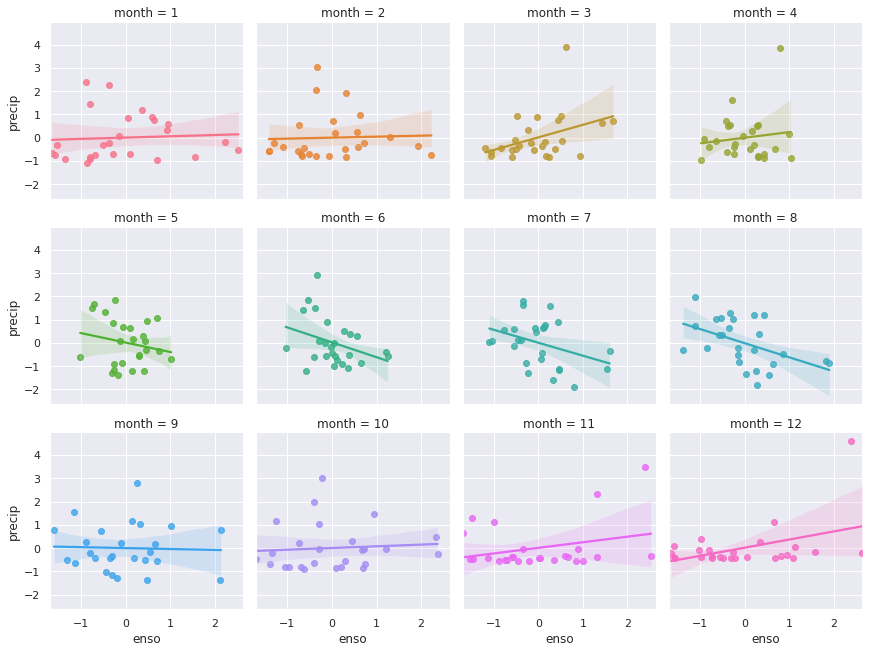

In [16]:
sns.lmplot(x = "enso",y = "precip", data = kanpur , col = "month" , hue ="month" , col_wrap=4, height=3)

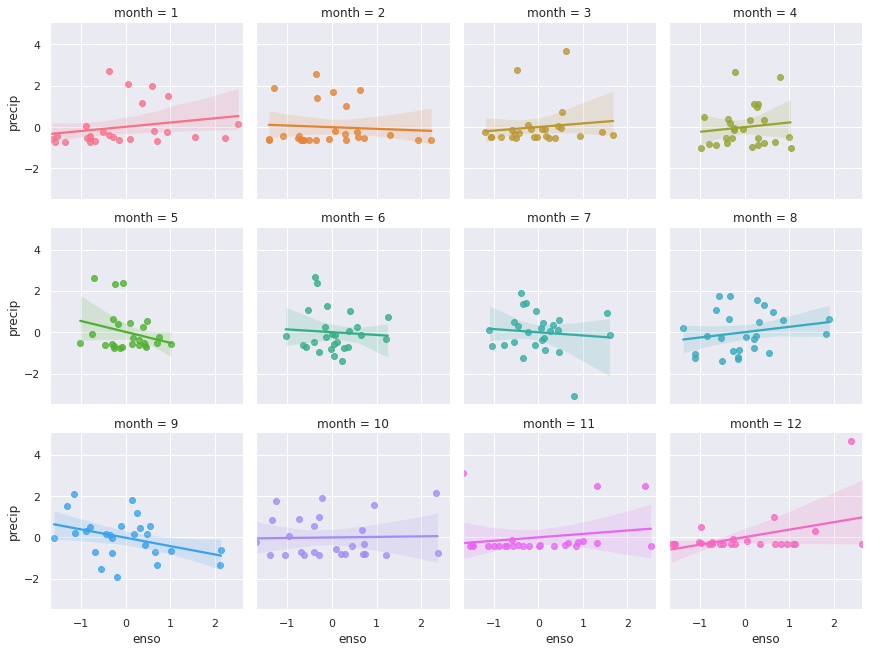

In [17]:
sns.lmplot(x = "enso",y = "precip", data = bhopal , col = "month" , hue ="month" , col_wrap=4, height=3)

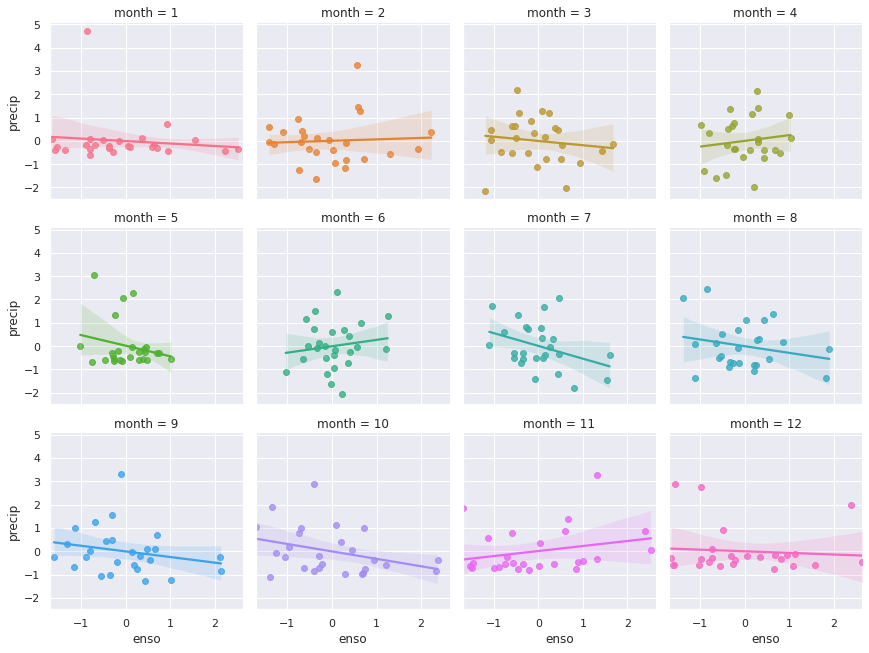

In [18]:
sns.lmplot(x = "enso",y = "precip", data = bombay , col = "month" , hue ="month" , col_wrap=4, height=3)

In [19]:
np.corrcoef(kanpur[kanpur.month == 6]["enso"], kanpur[kanpur.month == 6]["precip"])

array([[ 1.        , -0.34026667],
       [-0.34026667,  1.        ]])

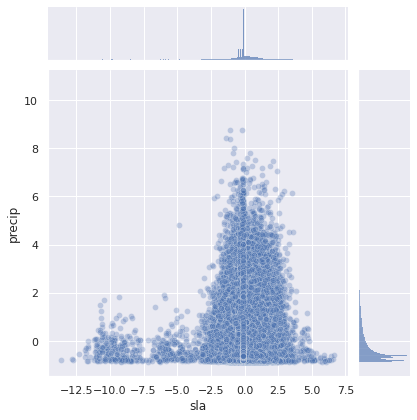

In [20]:
df["precip"] = df["precip"].groupby(pd.DatetimeIndex(df['time']).month).transform(lambda x: (x - x.mean()) / x.std())
sns.jointplot(y=df["precip"],x=df["sla"], alpha=.3)